In [1]:
"""Plot methane systemsize density."""
import matplotlib
import matplotlib.pyplot as plt

#matplotlib.use("pdf")
import os
import shutil

import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
import numpy as np
from matplotlib import rc
from matplotlib.ticker import (
    FormatStrFormatter,
    MaxNLocator,
    MultipleLocator,
    NullFormatter,
    ScalarFormatter,
    StrMethodFormatter,
)

In [2]:
plt.rcParams["font.family"] = "times" # "helvetica"
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'


In [3]:
symbols = {}

symbols["MCCCS-MN"] = "^"
symbols["MCCCS-MN (MOD)"] = "<"

symbols["LAMMPS"] = "D"


colors = {}
colors["MCCCS-MN"] = "#089099"
colors["MCCCS-MN (MOD)"] = "c"

colors["LAMMPS"] = "#7C1D6F"
engines = ["MCCCS-MN", "MCCCS-MN (MOD)", "LAMMPS"]

fill_styles = {
    "MCCCS-MN": "none", 
    "MCCCS-MN (MOD)": "none", 
    "LAMMPS": "full",
}

data_file = "methane_data.csv"

In [4]:
ms = 8  # markersize
xtickfs = 11  # xtickfontsize
xlabelfs = 14  # xlabelfontsize
ylabelfs = 14  # ylabelfontsize
ytickfs = 11  # ytickfontsize
titlefs = 14  # title size
legendfs = 9
alpha = 0.2

In [5]:
raw_data = np.genfromtxt(data_file, skip_header=1, delimiter=",")


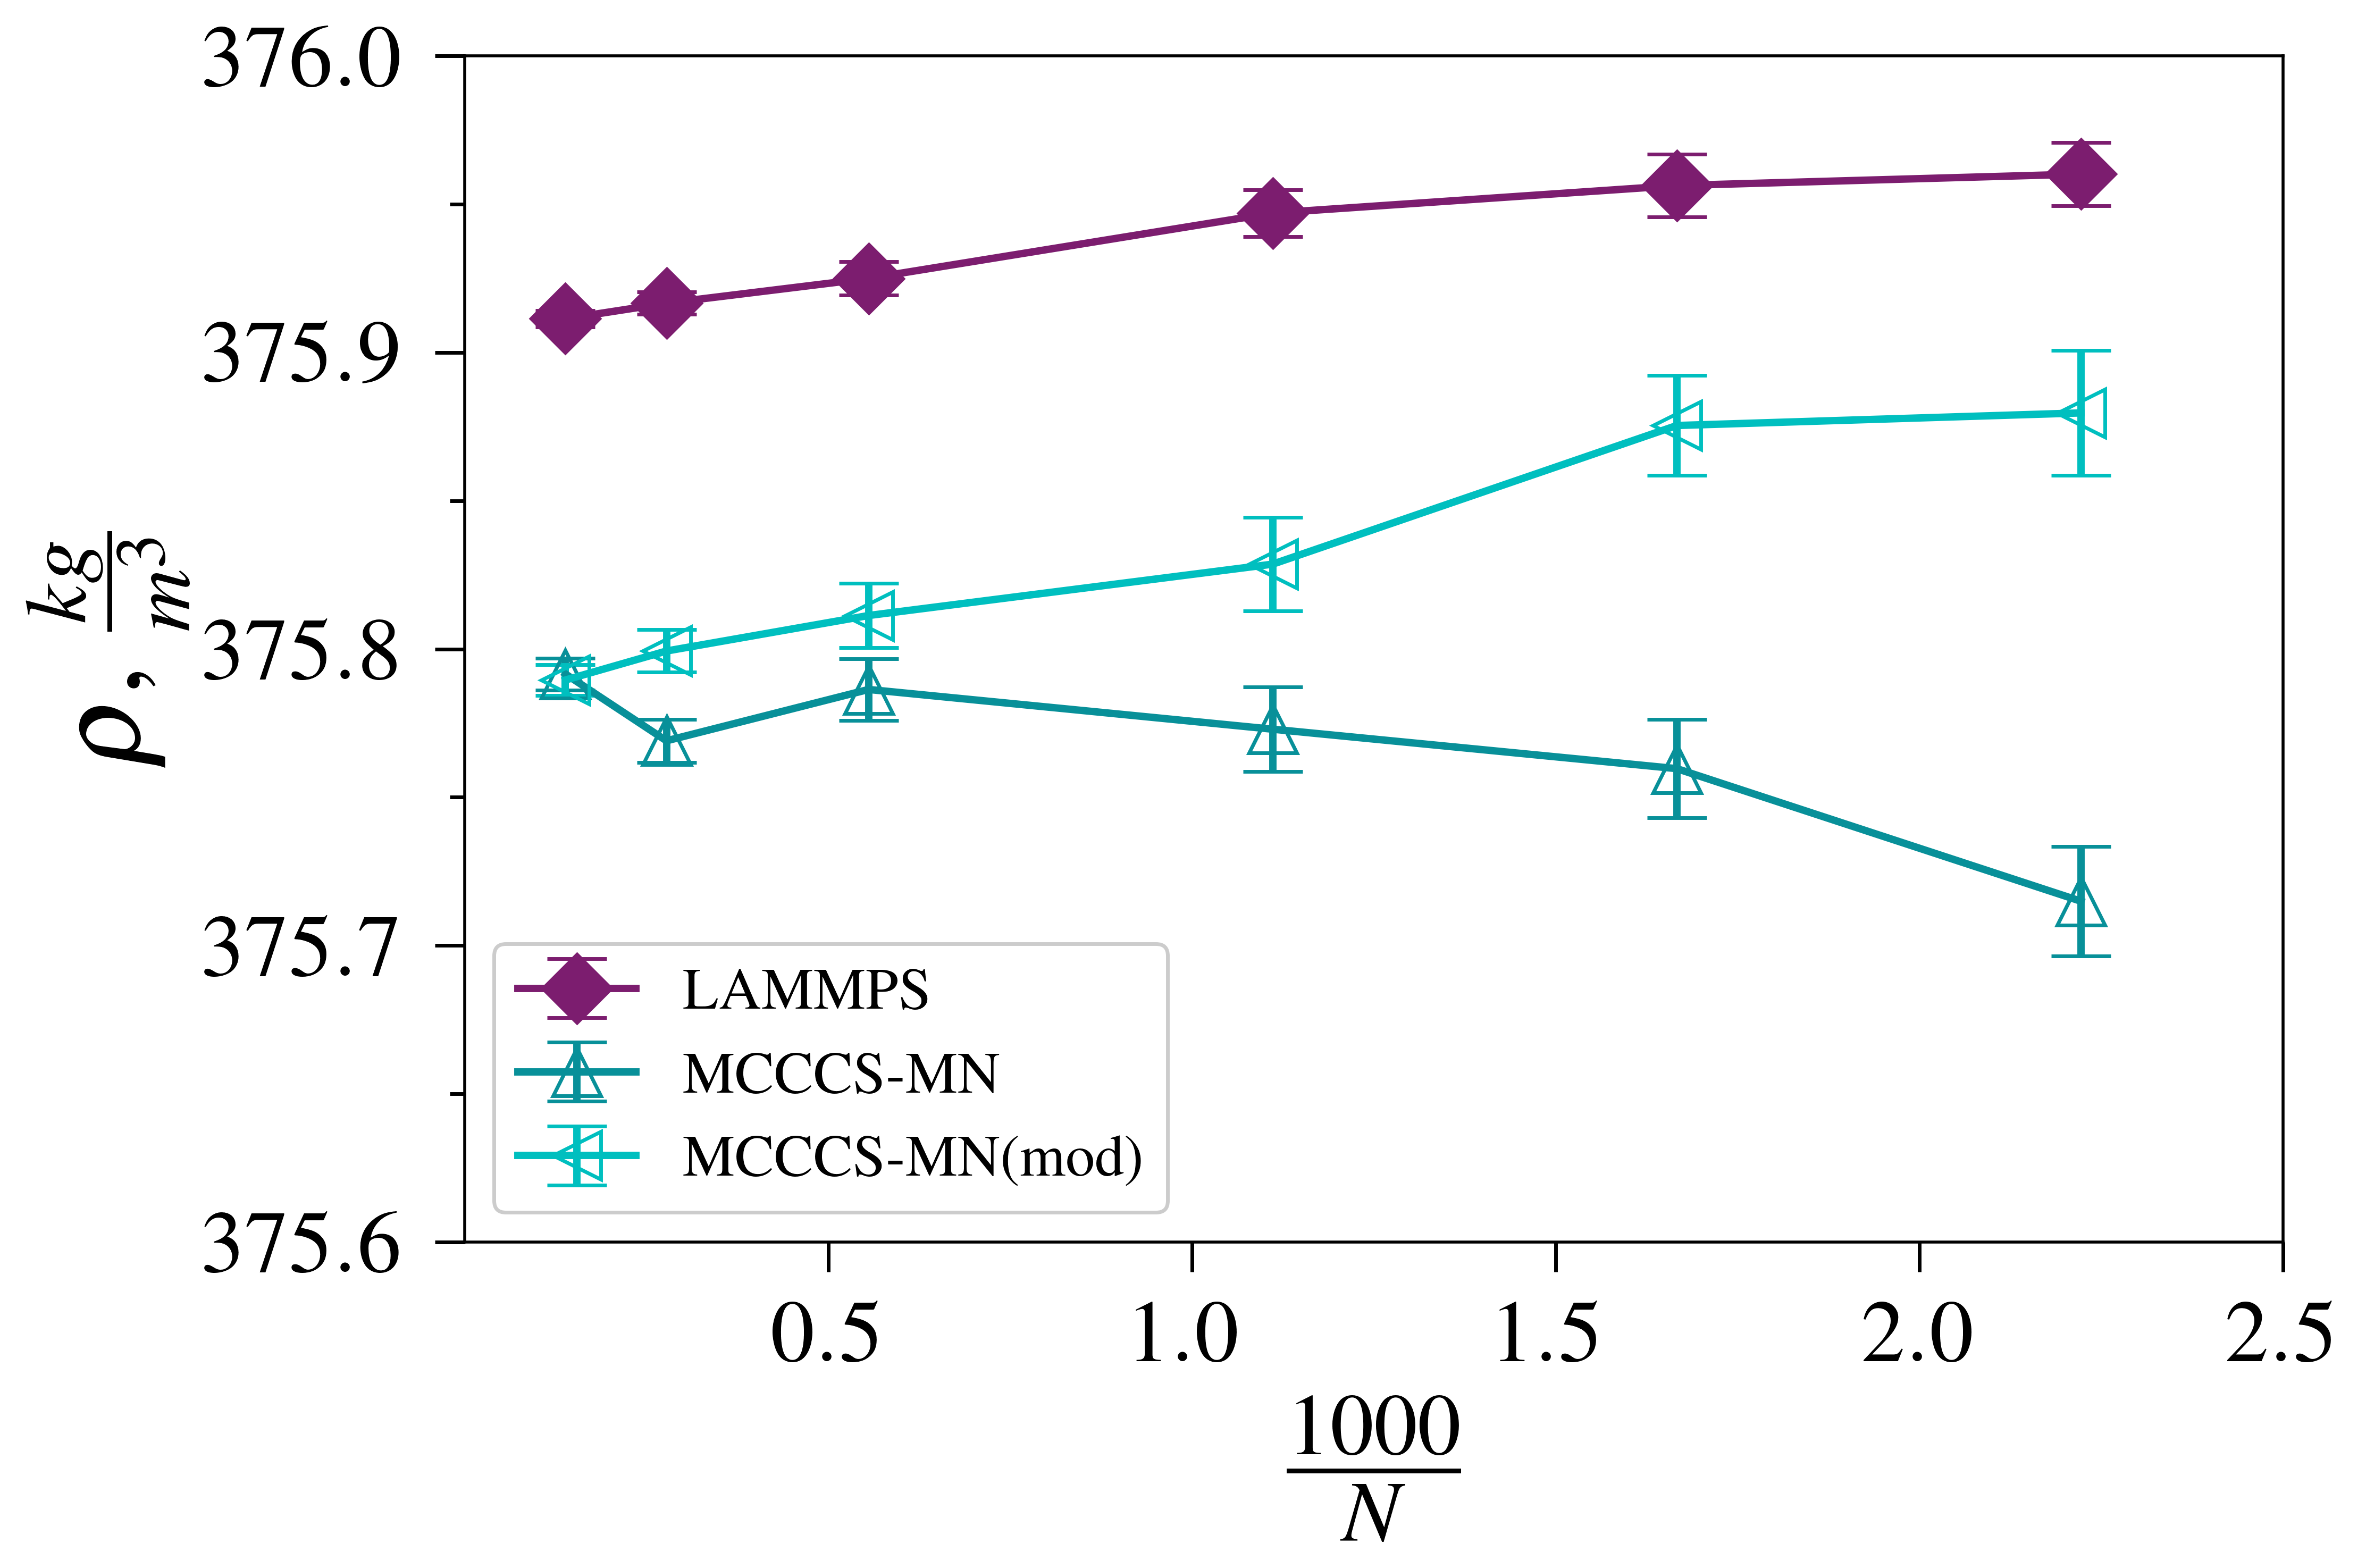

In [13]:
data = {}

N = [450, 600, 900, 1800, 3600, 7200]

for i, n in enumerate(N):
    data[n] = raw_data[i, 1:] * 1000

#figsize = (4.5, 4)
figsize = (9, 6)
fig, axs = plt.subplots(1, 1, sharex=False, sharey=False, figsize=figsize)
ax2 = axs

N = [450, 600, 900, 1800, 3600, 7200]
onebyN = [1000 / k for k in N]

Lammps = []
Lammps_err = []
MC3S = []
MC3S_err = []

MC3S_mod = []
MC3S_mod_err = []

for n in N:
    Lammps.append(data[n][4])
    Lammps_err.append(data[n][5])
    MC3S.append(data[n][0])
    MC3S_err.append(data[n][1])
    MC3S_mod.append(data[n][2])
    MC3S_mod_err.append(data[n][3])


ax2.errorbar(
    onebyN,
    Lammps,
    Lammps_err,
    #capsize=4,
    label="LAMMPS",
    marker=symbols["LAMMPS"],
    color=colors["LAMMPS"],
    fillstyle=fill_styles["LAMMPS"],
)
ax2.errorbar(
    onebyN,
    MC3S,
    MC3S_err,
    #capsize=4,
    label="MCCCS-MN",
    marker=symbols["MCCCS-MN"],
    color=colors["MCCCS-MN"],
    fillstyle=fill_styles["MCCCS-MN"],
)
ax2.errorbar(
    onebyN,
    MC3S_mod,
    MC3S_mod_err,
    #capsize=4,
    label="MCCCS-MN(mod)",
    marker=symbols["MCCCS-MN (MOD)"],
    color=colors["MCCCS-MN (MOD)"],
    fillstyle=fill_styles["MCCCS-MN (MOD)"],    
)
ax2.set_xlabel(r"$\frac{1000}{N}$")#, fontsize=xlabelfs)
ax2.set_ylabel(r"$\rho$, $\frac{kg}{m^3}$")# fontsize=ylabelfs)

#ax2.tick_params(axis="y", labelsize=ytickfs)
#ax2.tick_params(axis="x", labelsize=ytickfs)
props = dict(boxstyle="round", facecolor="none", alpha=1, ec="grey")
ax2.legend(frameon=True, 
           ncol=1, 
           #fontsize=legendfs,
           #labelspacing=0.05
            prop={'size': 16},

          )

ax2.tick_params(which='both', width=1)
ax2.tick_params(which="major", length=8, axis="y", bottom=False)
ax2.tick_params(which="minor", length=4, axis="y", bottom=False)
ax2.minorticks_on()
ax2.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))


ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    ) # labels along the bottom edge are off
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    length=8
    ) # labels along the bottom edge are off

# axes limits

ax2.set_xlim([0.0001, 2.5])
ax2.set_ylim([375.6, 376])
ax2.yaxis.set_major_locator(plt.MaxNLocator(4))

# adjusting ticks

for ax in [ax2]:
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

    


plt.tight_layout()

fig.tight_layout()

import os 
if not os.path.isdir("figures"):
    os.mkdir("figures")
    
plt.savefig(f"figures/methane_systemsize.pdf", 
            dpi=500, 
            bbox_inches='tight')